In [91]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [48]:
df=pd.read_csv('C:/Users/dell1/Desktop/ML_Data_Scientist_Case_Study_Data/ML Data Scientist Case Study Data.csv', sep=";")

In [49]:
df.head(6)

,row_num,locale,day_of_week,hour_of_day,agent_id,entry_page,path_id_set,traffic_type,session_durantion,hits
0,988681,L6,Monday,17,1,2111,31672;0,6,7037,\N
1,988680,L2,Thursday,22,10,2113,31965;0,2,49,14
2,988679,L4,Saturday,21,2,2100,0;78464,1,1892,14
3,988678,L3,Saturday,19,8,2113,51462,6,0,1
4,988677,L2,Tuesday,6,10,2116,31931;0,1,2,3
5,988676,L3,Monday,1,8,2100,0,1,0,2


In [50]:
df.describe()

,row_num,hour_of_day,agent_id,entry_page,traffic_type
count,988681.000000,988681.000000,988681.000000,988681.000000,988681.000000
mean,494341.000000,13.203988,7.350779,2253.265114,2.773766
std,285407.765082,6.718056,3.869630,775.083390,1.920976
min,1.000000,0.000000,0.000000,2100.000000,1.000000
25%,247171.000000,8.000000,6.000000,2111.000000,1.000000
50%,494341.000000,14.000000,9.000000,2113.000000,2.000000
75%,741511.000000,19.000000,10.000000,2116.000000,4.000000
max,988681.000000,23.000000,15.000000,8101.000000,10.000000


In [51]:
print(df.dtypes)

row_num               int64
locale               object
day_of_week          object
hour_of_day           int64
agent_id              int64
entry_page            int64
path_id_set          object
traffic_type          int64
session_durantion    object
hits                 object
dtype: object


In [52]:
#change type of hits and session duration from object to integer
df['hits']=pd.to_numeric(df['hits'], errors='coerce')
df['session_durantion']=pd.to_numeric(df['session_durantion'], errors='coerce')

In [53]:
df['locale']=df['locale'].astype('category')
df['day_of_week']=df['day_of_week'].astype('category')
df['path_id_set']=df['path_id_set'].astype('category')


In [54]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df['locale']=df['locale'].cat.codes
df['day_of_week']=df['day_of_week'].cat.codes
df['path_id_set']=df['path_id_set'].cat.codes

# data visualisation 

In [55]:
#compare id with missing values and the remaining

In [56]:
mis_val=df[df['hits'].isnull()]

In [57]:
avai_val=df[df['hits'].notnull()]

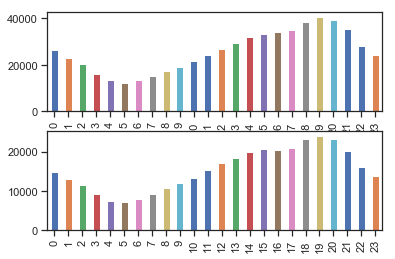

In [58]:
plt.subplot(2, 1, 1)
avai_val['hour_of_day'].value_counts().sort_index().plot(kind='bar')
plt.subplot(2, 1, 2)
mis_val['hour_of_day'].value_counts().sort_index().plot(kind='bar')

In [59]:
### from 17-21 uhr the number of hits is biggest

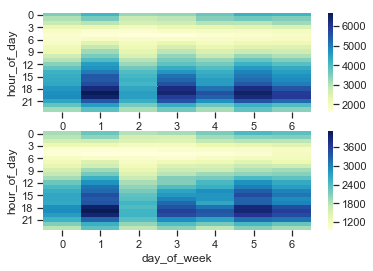

In [60]:
plt.subplot(2, 1, 1)
sns.heatmap((avai_val.groupby(["hour_of_day", "day_of_week"])["hits"].size().reset_index()).pivot("hour_of_day", "day_of_week", "hits"), cmap="YlGnBu")
plt.subplot(2, 1, 2)
sns.heatmap((mis_val.groupby(["hour_of_day", "day_of_week"])["hits"].size().reset_index()).pivot("hour_of_day", "day_of_week", "hits"), cmap="YlGnBu")

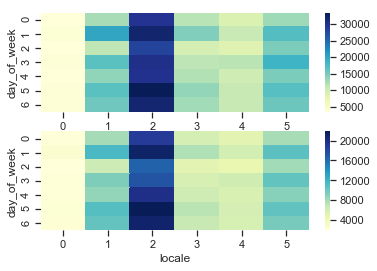

In [61]:
plt.subplot(2, 1, 1)
sns.heatmap((avai_val.groupby([ "day_of_week","locale"])["hits"].size().reset_index()).pivot( "day_of_week", "locale","hits"), cmap="YlGnBu")
plt.subplot(2, 1, 2)
sns.heatmap((mis_val.groupby([ "day_of_week","locale"])["hits"].size().reset_index()).pivot( "day_of_week", "locale","hits"), cmap="YlGnBu")

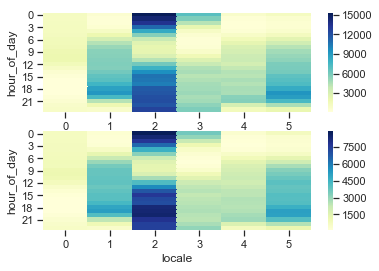

In [62]:
plt.subplot(2, 1, 1)
sns.heatmap((avai_val.groupby([ "hour_of_day","locale"])["hits"].size().reset_index()).pivot( "hour_of_day", "locale","hits"), cmap="YlGnBu")
plt.subplot(2, 1, 2)
sns.heatmap((mis_val.groupby([ "hour_of_day","locale"])["hits"].size().reset_index()).pivot( "hour_of_day", "locale","hits"), cmap="YlGnBu")

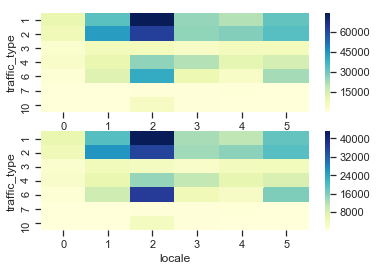

In [63]:
plt.subplot(2, 1, 1)
sns.heatmap((avai_val.groupby([ "traffic_type","locale"])["hits"].size().reset_index()).pivot( "traffic_type", "locale","hits"), cmap="YlGnBu")
plt.subplot(2, 1, 2)
sns.heatmap((mis_val.groupby([ "traffic_type","locale"])["hits"].size().reset_index()).pivot( "traffic_type", "locale","hits"), cmap="YlGnBu")

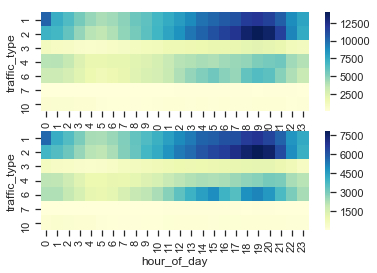

In [64]:
plt.subplot(2, 1, 1)
sns.heatmap((avai_val.groupby([ "traffic_type","hour_of_day"])["hits"].size().reset_index()).pivot( "traffic_type", "hour_of_day","hits"), cmap="YlGnBu")
plt.subplot(2, 1, 2)
sns.heatmap((mis_val.groupby([ "traffic_type","hour_of_day"])["hits"].size().reset_index()).pivot( "traffic_type", "hour_of_day","hits"), cmap="YlGnBu")

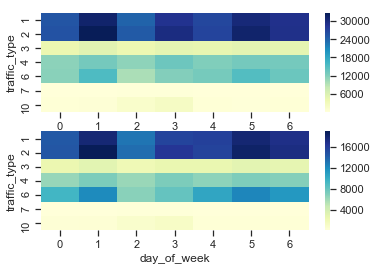

In [65]:
plt.subplot(2, 1, 1)
sns.heatmap((avai_val.groupby([ "traffic_type","day_of_week"])["hits"].size().reset_index()).pivot( "traffic_type", "day_of_week","hits"), cmap="YlGnBu")
plt.subplot(2, 1, 2)
sns.heatmap((mis_val.groupby([ "traffic_type","day_of_week"])["hits"].size().reset_index()).pivot( "traffic_type", "day_of_week","hits"), cmap="YlGnBu")


# Evauation metrics

In [66]:
from sklearn.metrics import mean_squared_error

def rmse(ytrue, ypred):
    return np.sqrt(mean_squared_error(ytrue, ypred))

# Data Processing

In [67]:
# Total missing values for each feature
print (df.isnull().sum())

row_num                   0
locale                    0
day_of_week               0
hour_of_day               0
agent_id                  0
entry_page                0
path_id_set               0
traffic_type              0
session_durantion       668
hits                 369446
dtype: int64


### handle missing values

In [68]:
round((df['session_durantion'].isnull().sum()/len(df))*100, 2)

0.07

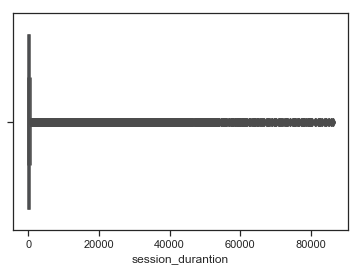

In [69]:
sns.boxplot(x=df['session_durantion'])

In [70]:
##IQR score

Q1 = df.session_durantion.quantile(0.25)
Q3 = df.session_durantion.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

320.0


In [71]:
print(df.session_durantion < (Q1 - 1.5 * IQR)) or (df.session_durantion > (Q3 + 1.5 * IQR))

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
988651    False
988652    False
988653    False
988654    False
988655    False
988656    False
988657    False
988658    False
988659    False
988660    False
988661    False
988662    False
988663    False
988664    False
988665    False
988666    False
988667    False
988668    False
988669    False
988670    False
988671    False
988672    False
988673    False
988674    False
988675    False
988676    False
988677    False
988678    False
988679    False
988680    False
Name: session_durantion,

0          True
1         False
2          True
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10         True
11        False
12        False
13        False
14        False
15         True
16        False
17         True
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26         True
27        False
28        False
29        False
          ...  
988651    False
988652    False
988653    False
988654    False
988655    False
988656    False
988657    False
988658    False
988659     True
988660    False
988661    False
988662    False
988663    False
988664    False
988665    False
988666     True
988667    False
988668    False
988669     True
988670    False
988671    False
988672     True
988673    False
988674    False
988675    False
988676    False
988677    False
988678     True
988679    False
988680     True
Name: session_durantion,

In [72]:
df_out = df[~((df.session_durantion < (Q1 - 1.5 * IQR)) | (df.session_durantion > (Q3 + 1.5 * IQR)))]
df_out.shape

(846215, 10)

C:\Users\dell1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


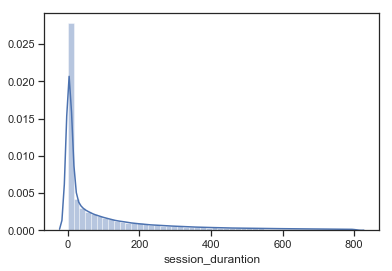

In [73]:
sns.distplot(df_out[~df_out.session_durantion.isnull()].session_durantion)###right skewness=> use Logarithm transformation

C:\Users\dell1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


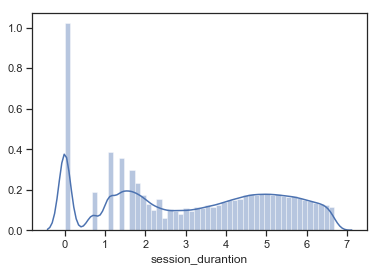

In [74]:
sns.distplot(df_out[~df_out.session_durantion.isnull()].session_durantion.apply(np.log1p))

In [75]:
df_out['session_durantion']=df_out.session_durantion.apply(np.log1p)

C:\Users\dell1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
###session duration
df_out.session_durantion.replace(np.nan, df_out.session_durantion.median(), inplace=True)

C:\Users\dell1\Anaconda3\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [77]:
#create new variables for the number of location:
df_out['number_thevistedlocations']=df_out['path_id_set'].astype(str).apply(lambda x: len(x.split(';')))

C:\Users\dell1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
# convert hour_of_day and day_of_week to new feattures that are more informative
df_out['hour_sin'] = np.sin(df_out.hour_of_day*(2.*np.pi/24))
df_out['hour_cos'] = np.cos(df_out.hour_of_day*(2.*np.pi/24))
df_out['day_sin'] = np.sin((df_out.day_of_week-1)*(2.*np.pi/7))
df_out['day_cos'] = np.cos((df_out.day_of_week-1)*(2.*np.pi/7))

C:\Users\dell1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dell1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dell1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

### Feature transformation

In [79]:
train = df_out[~np.isnan(df_out['hits'])]
test = df_out[np.isnan(df_out['hits'])]

In [80]:
X = train.drop(['hits','day_of_week','hour_of_day'], axis=1)
y = pd.DataFrame(train['hits'])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
sc_standard = StandardScaler()  
X_train_standard = sc_standard.fit_transform(X_train)  
X_test_standard = sc_standard.transform(X_test)

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [41]:

rd = Ridge(alpha = 4.84)

rf = RandomForestRegressor(n_estimators = 12,max_depth = 3,n_jobs = -1)

gb = GradientBoostingRegressor( n_estimators = 40, max_depth = 2)

nn = MLPRegressor(hidden_layer_sizes = (90, 90),alpha = 2.75)

# Quickly check algorithms

In [42]:
rf.fit(X_train_standard, y_train)
y_pred = rf.predict(X_train_standard)
print((rmse(y_train, y_pred)))


C:\Users\dell1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


17.466852735529987


In [43]:
gb.fit(X_train_standard, y_train)
y_pred = gb.predict(X_train_standard)
print((rmse(y_train, y_pred)))

C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


17.20037897430212


In [44]:
nn.fit(X_train_standard, y_train)
y_pred = nn.predict(X_train_standard)
print((rmse(y_train, y_pred)))

C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


17.12855347094068


In [45]:
xgb = XGBRegressor(nthread=-1) 
xgb.fit(X_train_standard, y_train)
y_pred = xgb.predict(X_train_standard)
print((rmse(y_train, y_pred)))

[08:43:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
16.932234577790684


# Parameter tuning

In [115]:
#Logistic regression
grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
lireg=linear_model.LinearRegression()
lireg_cv=GridSearchCV(lireg,grid,cv=10)
lireg_cv.fit(X_train_standard,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'fit_intercept': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [116]:
y_pred = lireg_cv.predict(X_train_standard)
print((rmse(y_train, y_pred)))

18.093840076236987


In [117]:
y_pred = lireg_cv.predict(X_test_standard)
print((rmse(y_test, y_pred)))

17.204583992925457


In [128]:
### neural net
param_grid={
    'solver': [ "adam"],'alpha' : [1,2,5],
    'activation': ["tanh", "relu"]}
nn=MLPRegressor()
grid = GridSearchCV(nn, param_grid,cv=10)
grid.fit(X_train_standard, y_train)

C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was 

C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was 

C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1, 2, 5], 'solver': ['adam'], 'activation': ['tanh', 'relu']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [130]:
y_pred = grid.predict(X_train_standard)
print((rmse(y_train, y_pred)))

17.196101842518488


In [131]:
y_pred = grid.predict(X_test_standard)
print((rmse(y_test, y_pred)))

16.289688098968927


In [63]:
# A parameter grid for XGBoost
params = {'min_child_weight':[1,5], 'gamma':[0.5, 1, 2, 3],  'subsample':[0.6,0.7],
'colsample_bytree':[0.6,0.7], 'max_depth': [2,3]}


In [65]:
xgb = XGBRegressor(nthread=-1) 

grid = GridSearchCV(xgb, params,cv=10)
grid.fit(X_train_standard, y_train)

[11:44:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:45:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:45:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:46:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:46:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:46:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:47:12] WARNI

[12:03:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:04:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:04:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:05:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:05:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:06:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:06:37] WARNI

[12:25:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:05] WARNI

[12:45:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:07] WARNI

[13:03:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:04:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:04:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:06:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:06:52] WARNI

[13:25:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:26:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:26:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:26:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:29] WARNI

[13:44:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:45:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:45:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:57] WARNI

[14:04:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:05:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:05:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:05:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:46] WARNI

[14:26:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:31] WARNI

[14:45:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:47:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:47:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:36] WARNI

[15:07:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:07:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:07:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:08:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:08:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:09:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:09:31] WARNI

[15:28:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:31:10] WARNI

[15:47:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:48:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:48:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:49:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:49:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:50:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:50:37] WARNI

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_child_weight': [1, 5], 'colsample_bytree': [0.6, 0.7], 'subsample': [0.6, 0.7], 'max_depth': [2, 3], 'gamma': [0.5, 1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
print(grid.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=3,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.7, verbosity=1)


In [99]:
xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=3,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.7, verbosity=1) 
xgb.fit(X_train_standard, y_train)
y_pred = xgb.predict(X_train_standard)
print((rmse(y_train, y_pred)))

[13:14:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
16.961308789833744


In [100]:
y_pred_xgb = xgb.predict(X_test_standard)
print((rmse(y_test, y_pred_xgb)))

16.047625012184962


In [93]:
##random forest
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [30]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

grid_search.fit(X_train_standard, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 54.2min finished
C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [5, 10, 15], 'min_samples_leaf': [3, 4, 5], 'n_estimators': [30], 'min_samples_split': [8, 10], 'max_features': [2, 3], 'bootstrap': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [96]:
grid_search.best_estimator_


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [97]:
rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False) 
rf.fit(X_train_standard, y_train)
y_pred = rf.predict(X_train_standard)
print((rmse(y_train, y_pred)))

C:\Users\dell1\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


15.524256903557513


In [98]:
y_pred1 = rf.predict(X_test_standard)
print((rmse(y_test, y_pred1)))

16.034526818373926


In [134]:
X_submit = test.drop(['hits', 'day_of_week', 'hour_of_day'], axis=1)
dsubmit = rf.predict(X_submit)


csv_df = pd.DataFrame({'row_num': test['row_num'], 'hits': np.round(np.maximum(dsubmit,0))}, columns=['row_num', 'hits'])
csv_df.to_csv('test_prediction.csv', index=False)